In [0]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [0]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [0]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 25s 505us/sample - loss: 1.2846 - accuracy: 0.5560 - val_loss: 1.3682 - val_accuracy: 0.5247
Epoch 2/50
50000/50000 [==============================] - 24s 478us/sample - loss: 0.8440 - accuracy: 0.7078 - val_loss: 0.7948 - val_accuracy: 0.7245
Epoch 3/50
50000/50000 [==============================] - 24s 478us/sample - loss: 0.6939 - accuracy: 0.7613 - val_loss: 0.8090 - val_accuracy: 0.7326
Epoch 4/50
50000/50000 [==============================] - 24s 471us/sample - loss: 0.5960 - accuracy: 0.7957 - val_loss: 0.7991 - val_accuracy: 0.7369
Epoch 5/50
50000/50000 [==============================] - 24s 470us/sample - loss: 0.5020 - accuracy: 0.8272 - val_loss: 0.6638 - val_accuracy: 0.7833
Epoch 6/50
50000/50000 [==============================] - 24s 472us/sample - loss: 0.4217 - accuracy: 0.8536 - val_loss: 0.6181 - val_accuracy: 0.8042
Epoch 7/50
50000/50000 [====================

In [0]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 41s 27ms/step - loss: 0.5540 - accuracy: 0.8219 - val_loss: 0.5239 - val_accuracy: 0.8261
Epoch 2/50
1562/1562 [==============================] - 41s 26ms/step - loss: 0.4396 - accuracy: 0.8568 - val_loss: 0.5174 - val_accuracy: 0.8366
Epoch 3/50
1562/1562 [==============================] - 42s 27ms/step - loss: 0.4109 - accuracy: 0.8628 - val_loss: 0.4509 - val_accuracy: 0.8526
Epoch 4/50
1562/1562 [==============================] - 41s 26ms/step - loss: 0.3877 - accuracy: 0.8711 - val_loss: 0.4455 - val_accuracy: 0.8525
Epoch 5/50
1562/1562 [==============================] - 41s 26ms/step - loss: 0.3679 - accuracy: 0.8758 - val_loss: 0.4635 - val_accuracy: 0.8529
Epoch 6/50
1562/1562 [==============================] - 41s 26ms/step - loss: 0.3503 - accuracy: 0.8816 - val_loss: 0.4604 - val_accuracy: 0.8535
Epoch 7/50
1562/1562 [==============================] - 41s 26ms/step - loss: 0.3438 - accuracy: 0.8851 - val_loss: 0.4861 -

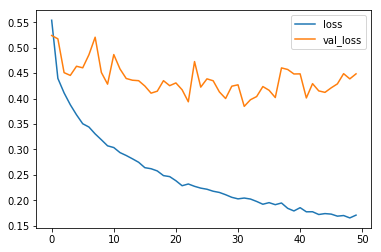

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

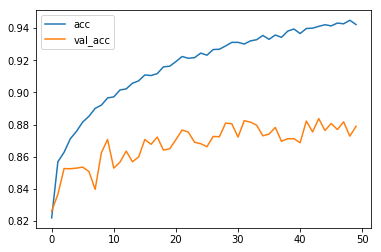

In [0]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[875  12  28  15   8   4   8   8  29  13]
 [  1 970   2   2   0   0   2   0   7  16]
 [ 17   0 837  31  20  22  52  12   4   5]
 [  5   3  27 763  30  82  64  13   8   5]
 [  2   0  40  27 843  12  44  30   2   0]
 [  4   4  18 114  23 784  30  21   0   2]
 [  3   1  10  23   8   6 946   0   2   1]
 [  5   1  15  16  24  13   7 918   0   1]
 [ 26   8   3   5   3   1   6   4 931  13]
 [  2  57   2   5   2   0   1   3   6 922]]


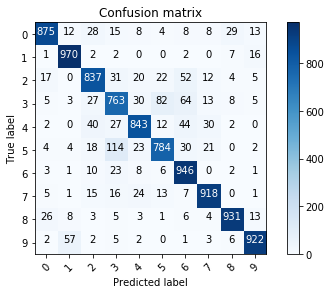

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

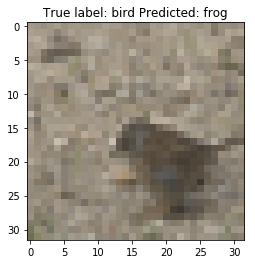

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [0]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        1849